In [1]:
import os
import rasterio
import numpy as np
from matplotlib import pyplot as plt

def calculate_ndssi(caminho_b3, caminho_b2):
    with rasterio.open(caminho_b3) as src_b3, rasterio.open(caminho_b2) as src_b2:
        # Ler os dados das bandas como matrizes numpy
        b3 = src_b3.read(1).astype(float)
        b2 = src_b2.read(1).astype(float)

        # Calcular e imprimir o maior e o menor valor após a normalização
        print(f'Max value in b3: {np.max(b3)}')
        if np.min(b3)==0:
            # Encontrar o menor valor em b3 maior que zero
            min_positive_b3 = np.min(b3[(b3 > 0)])
            # Exibir o menor valor presente em b3 maior que zero
            print(f'Min value in b3: {min_positive_b3}')
        else:
            print(f'Min value in b3: {np.min(b3)}')
        print(f'Max value in b2: {np.max(b2)}')
        if np.min(b2)==0:
            # Encontrar o menor valor em b2 maior que zero
            min_positive_b2 = np.min(b2[(b2 > 0)])
            # Exibir o menor valor presente em b2 maior que zero
            print(f'Min value in b2: {min_positive_b2}')
        else:
            print(f'Min value in b2: {np.min(b2)}')

        # Mostrar o número de elementos em b2
        print(f'Number of elements in b2: {np.size(b2)}')
        # Mostrar o número de elementos em b3
        print(f'Number of elements in b3: {np.size(b3)}')

        # Contar o número de elementos com valor 0 em b2
        num_zeros_b2 = np.count_nonzero(b2 == 0)
        print(f'Number of elements with value 0 in b2: {num_zeros_b2}')
        # Contar o número de elementos com valor 0 em b3
        num_zeros_b3 = np.count_nonzero(b3 == 0)
        print(f'Number of elements with value 0 in b3: {num_zeros_b3}')

        # Máscara para considerar apenas valores diferentes de zero em b3 e b2
        mask_nonzero = (b3 != 0) & (b2 != 0)

        # Calcular NDSSI apenas para os valores não nulos em b3 e b2
        ndssi = np.zeros_like(b3, dtype=float)
        ndssi[mask_nonzero] = (b3[mask_nonzero] - b2[mask_nonzero]) / (b3[mask_nonzero] + b2[mask_nonzero])

        # Exibir o NDSSI resultante
        print(f'Max value in ndssi: {np.max(ndssi)}')
        # Encontrar o menor valor em ndssi maior que zero
        min_positive_ndssi = np.min(ndssi[(ndssi > 0)])
        # Exibir o menor valor presente em ndssi maior que zero
        print(f'Min value in ndssi: {min_positive_ndssi}')

        # Exibir o NDSSI
        plt.imshow(ndssi, cmap='coolwarm', vmin=-1, vmax=1)
        plt.colorbar(label='NDSSI')
        plt.title('Índice de Concentração de Deoxirribonucleico (NDSSI)')
        plt.show()

Max value in b3: 4535.0
Min value in b3: 2726.0
Max value in b2: 2189.0
Min value in b2: 478.0
Number of elements in b2: 49
Number of elements in b3: 49
Number of elements with value 0 in b2: 7
Number of elements with value 0 in b3: 7
Max value in ndssi: 0.8020703933747412
Min value in ndssi: 0.2845332414743369


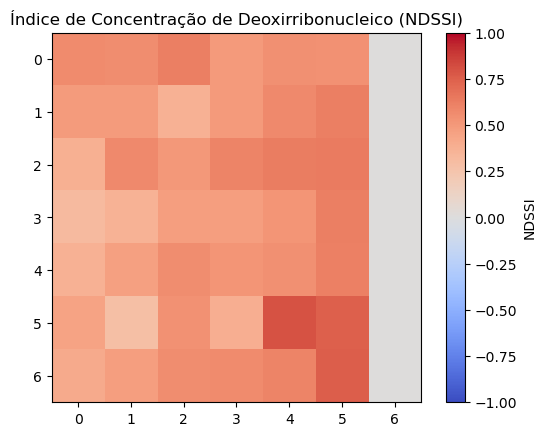

In [2]:
# Exemplo de uso da função
caminho_b3 = '/home/barcelos/Desktop/L/ML14/ML14CUTB3/2014-11-29-00:00_2014-11-29-23:59_MODIS_B3_CUT.tif'
caminho_b2 = '/home/barcelos/Desktop/L/ML14/ML14CUTB2/2014-11-29-00:00_2014-11-29-23:59_MODIS_B2_CUT.tif'
calculate_ndssi(caminho_b3, caminho_b2)

Max value in b3: 65535.0
Min value in b3: 334.0
Max value in b2: 65535.0
Min value in b2: 7.0
Number of elements in b2: 21527
Number of elements in b3: 21527
Number of elements with value 0 in b2: 805
Number of elements with value 0 in b3: 0
Max value in ndssi: 0.9949856733524355
Min value in ndssi: 0.001935483870967742


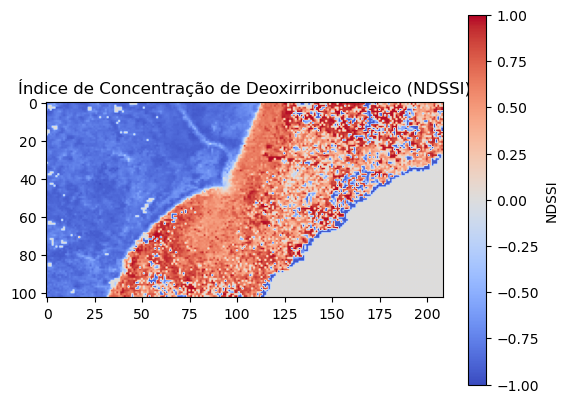

In [5]:
# Exemplo de uso da função
caminho_b3 = "/home/barcelos/Desktop/L/ML14/ML14/2014-11-29-00:00_2014-11-29-23:59_MODIS_B3.TIF"
caminho_b2 = "/home/barcelos/Desktop/L/ML14/ML14/2014-11-29-00:00_2014-11-29-23:59_MODIS_B2.TIF"
calculate_ndssi(caminho_b3, caminho_b2)